In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 22 10:32:06 2022

@author: Luigi Portinale
"""
## load the libraries 
from keras.api.layers import Dense, Input
from sklearn.model_selection import train_test_split
from keras.api.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.api.models import Model

### read dataset 
from keras.api.datasets import fashion_mnist as dataset
(train_x, train_y), (_, _) = dataset.load_data()

## normalize and reshape the predictors  
train_x = train_x / 255

## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

#Create Autoencoder architecture
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='relu')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='sigmoid')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

#Print summary
model.summary()

#train the model with early stopping callback.
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=500, validation_data=(val_x, val_x), callbacks=[early_stopping])


375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


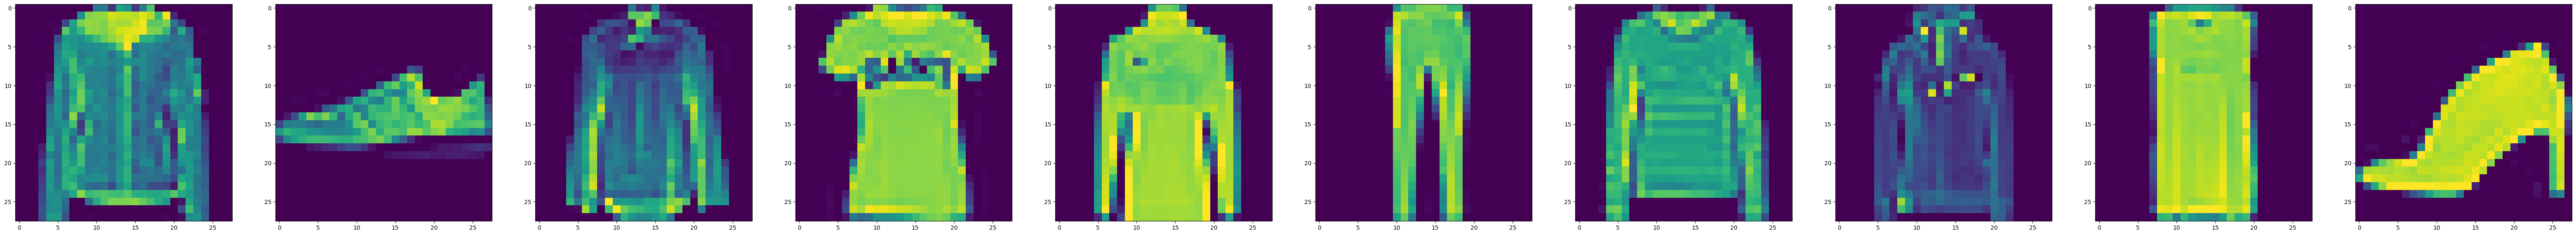

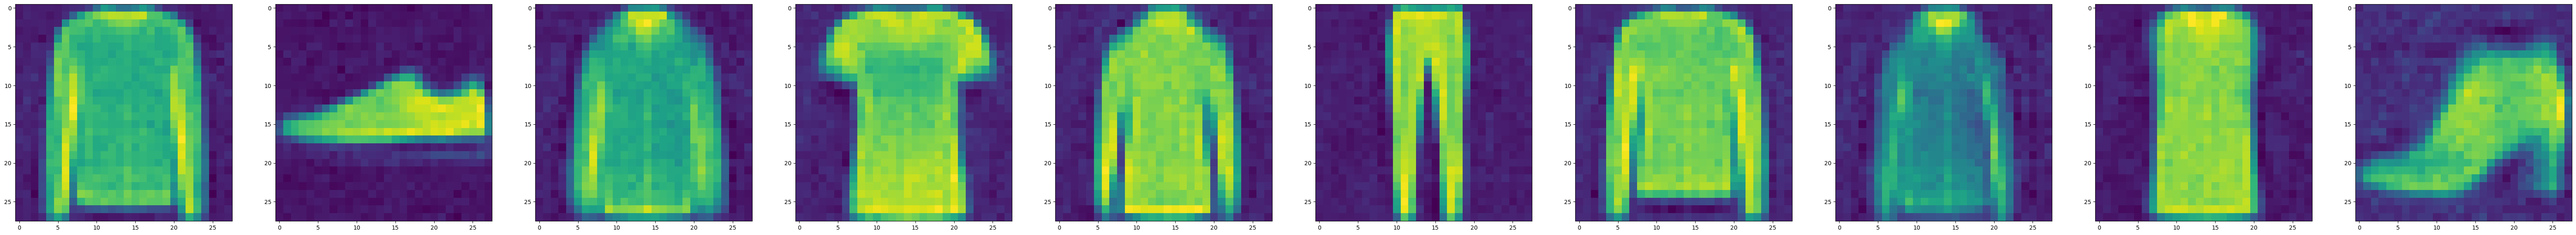

In [4]:
# predictions
totals = 10
preds = model.predict(val_x)

# Actual images
f, ax = plt.subplots(1,totals)
f.set_size_inches(80, 40)
for i in range(totals):
    ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

# Output images
f, ax = plt.subplots(1,totals)
f.set_size_inches(80, 40)
for i in range(totals):
    ax[i].imshow(preds[i].reshape(28, 28))
plt.show()
